In [328]:
import csv
import pandas as pd
from csv import reader
import time
from matplotlib import pyplot as plt
from configparser import ConfigParser
from pandas_profiling import ProfileReport
from datetime import datetime
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import linear_model
from scipy.stats.stats import pearsonr 
from matplotlib.pyplot import figure

C:\Users\rliam\AppData\Local\Temp\ipykernel_2996\1042970739.py:18: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [329]:
file = r'C:\Users\rliam\Downloads\US1969-1986 (2)\Natality.csv'

In [330]:
df = pd.read_csv(r'C:\Users\rliam\Desktop\project\sampled_data.csv')

C:\Users\rliam\AppData\Local\Temp\ipykernel_2996\673787785.py:1: DtypeWarning: Columns (1,6,38,39,40,41,54,56,69,75,76,77,78,79,80,81,82,83,85,86,87,88,89,90,92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\rliam\Desktop\project\sampled_data.csv')


In [331]:
with open('correlation_table.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file)
    headers = [key for key in df.keys()]
    csv_writer.writerow(headers)
    csv_writer.writerows(df.corr())
    csv_file.close()

In [332]:
#coorelation_table = df.corr()

In [333]:
#coorelation_table.to_csv('coorelation_table.csv')

In [334]:
df.sort_values(by=['DT_DOB'])

,DT_YEAR,ID_STATE,ID_AREA,ID_CERT,IN_RESIDENT,ID_RES_STATUS,ID_RESIDENCE,ID_OCCURENCE,ID_SEX,ID_ATTENDANT,...,AM_POST_FULL_DOB,AM_LUNAR_MONTH_DOB,DT_DOB,id,State,County,County FIPS,GHIAnnual,nchs_state,nchs_county
501807,1969,,0,,1,1,390420000000000.0,3904123,2,1,...,28,12,1/1/1969,55315258,Pennsylvania,Lycoming,42081.0,3.778660,39.0,41.0
337517,1969,,0,,2,2,472140000000000.0,4731854,2,1,...,28,12,1/1/1969,52867794,NaN,NaN,NaN,NaN,NaN,NaN
6185,1969,,0,,1,1,50310000000000.0,503093,2,1,...,28,12,1/1/1969,55150357,California,Orange,6059.0,5.202893,5.0,30.0
24797,1969,,0,,1,1,60220000000000.0,602184,2,1,...,28,12,1/1/1969,56376802,Colorado,El Paso,8041.0,4.955612,6.0,21.0
365465,1969,,0,,1,1,3.8021E+14,3802092,2,1,...,28,12,1/1/1969,55077591,Oregon,Lane,41039.0,3.937903,38.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289937,1988,14,0,,1,1,140170000000000.0,1401633,2,1,...,13,256,9/9/1988,1820873,Illinois,Cook,17031.0,3.874192,14.0,16.0
306310,1988,5,0,,1,1,50191600000000.0,501993,2,1,...,13,256,9/9/1988,1426708,California,Los Angeles,6037.0,5.472199,5.0,19.0
64604,1988,14,0,,2,2,141000000000000.0,1401633,2,1,...,13,256,9/9/1988,1827561,Illinois,Will,17197.0,3.887701,14.0,99.0
20478,1988,10,0,,2,2,100360000000000.0,1004859,1,1,...,13,256,9/9/1988,1111501,Florida,Lake,12069.0,4.882679,10.0,35.0


<AxesSubplot:>

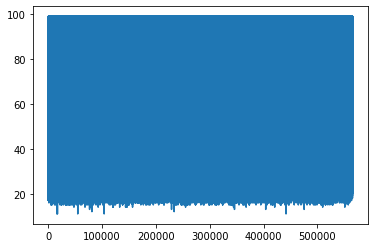

In [335]:
df['AM_F_AGE'].plot()

In [336]:
def time_series_graph(variable):
    months = []
    values = []
    for year in range(1969, 1988):
        for month in range(1, 12):
            months.append(str(month) + "/" + str(year))
    for year in range(1969, 1988):
        for month in range(1, 12):
            month_year = str(month) + '-' + str(year)
            values.append(df[df['month_year'] == month_year][variable].mean())
    plt.plot(values)
    plt.xlabel('Months from January 1969')
    plt.ylabel(variable)
    figure(figsize=(8, 6), dpi=80)
    plt.show()
    
    

In [337]:
def give_month_and_year(row):
    date = row['DT_DOB']
    return str(date[0:date.find('/')]) + date[3:][date[3:].find('/'):]

In [338]:
df['year'] = pd.DatetimeIndex(df['DT_DOB']).year
df['month'] = pd.DatetimeIndex(df['DT_DOB']).month

In [339]:
df['month_year'] = df['month'].astype(str) + '-' + df['year'].astype(str)

In [340]:
df.index = df['id']
df['var_1'] = df['AM_TOT_B_ORDER'] - (df['AM_CHILDREN _BASL'] + df['AM_CHILDREN_BAND'])

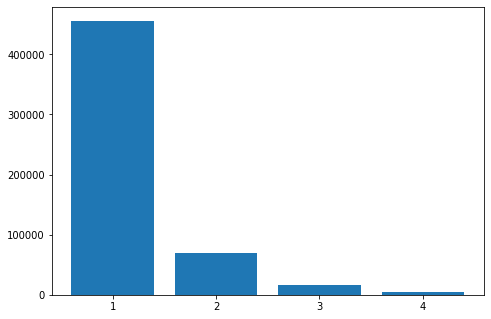

In [341]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bar_labels = ['1', '2', '3', '4']
bar_heights = [df[df['var_1'] == 1]['var_1'].count(),
              df[df['var_1'] == 2]['var_1'].count(),
              df[df['var_1'] == 3]['var_1'].count(),
              df[df['var_1'] == 4]['var_1'].count()]
ax.bar(bar_labels,bar_heights)
plt.show()

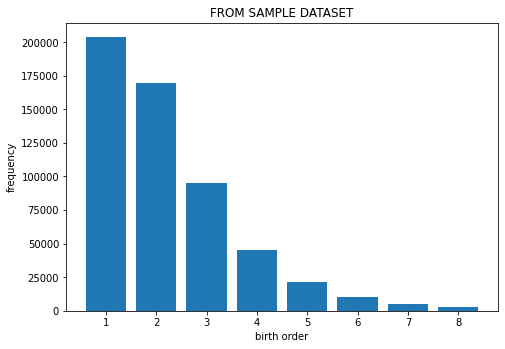

In [342]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bar_labels = ['1', '2', '3', '4', '5', '6', '7', '8']
bar_heights = [df[df['AM_TOT_B_ORDER'] == 1]['AM_TOT_B_ORDER'].count(),
              df[df['AM_TOT_B_ORDER'] == 2]['AM_TOT_B_ORDER'].count(),
              df[df['AM_TOT_B_ORDER'] == 3]['AM_TOT_B_ORDER'].count(),
              df[df['AM_TOT_B_ORDER'] == 4]['AM_TOT_B_ORDER'].count(),
              df[df['AM_TOT_B_ORDER'] == 5]['AM_TOT_B_ORDER'].count(),
              df[df['AM_TOT_B_ORDER'] == 6]['AM_TOT_B_ORDER'].count(),
              df[df['AM_TOT_B_ORDER'] == 7]['AM_TOT_B_ORDER'].count(),
              df[df['AM_TOT_B_ORDER'] == 8]['AM_TOT_B_ORDER'].count()]
ax.bar(bar_labels,bar_heights)
plt.xlabel('birth order')
plt.ylabel('frequency')
plt.title('FROM SAMPLE DATASET')
plt.show()

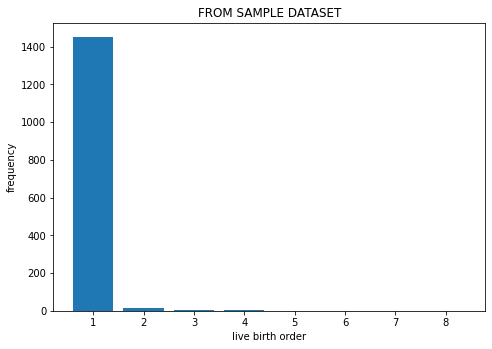

In [343]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bar_labels = ['1', '2', '3', '4', '5', '6', '7', '8']
bar_heights = [df[df['AM_LIVE_B_ORDER'] == 1]['AM_LIVE_B_ORDER'].count(),
              df[df['AM_LIVE_B_ORDER'] == 2]['AM_LIVE_B_ORDER'].count(),
              df[df['AM_LIVE_B_ORDER'] == 3]['AM_LIVE_B_ORDER'].count(),
              df[df['AM_LIVE_B_ORDER'] == 4]['AM_LIVE_B_ORDER'].count(),
              df[df['AM_LIVE_B_ORDER'] == 5]['AM_LIVE_B_ORDER'].count(),
              df[df['AM_LIVE_B_ORDER'] == 6]['AM_LIVE_B_ORDER'].count(),
              df[df['AM_LIVE_B_ORDER'] == 7]['AM_LIVE_B_ORDER'].count(),
              df[df['AM_LIVE_B_ORDER'] == 8]['AM_LIVE_B_ORDER'].count()]
ax.bar(bar_labels,bar_heights)
plt.xlabel('live birth order')
plt.ylabel('frequency')
plt.title('FROM SAMPLE DATASET')
plt.show()

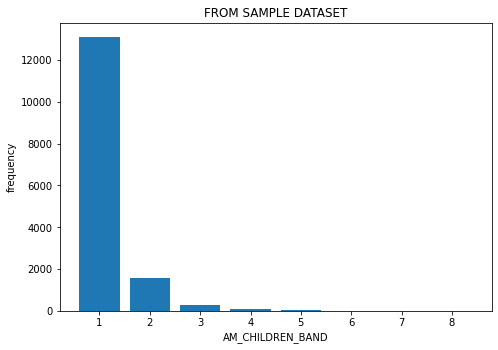

In [344]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bar_labels = ['1', '2', '3', '4', '5', '6', '7', '8']
bar_heights = [df[df['AM_CHILDREN_BAND'] == 1]['AM_CHILDREN_BAND'].count(),
              df[df['AM_CHILDREN_BAND'] == 2]['AM_CHILDREN_BAND'].count(),
              df[df['AM_CHILDREN_BAND'] == 3]['AM_CHILDREN_BAND'].count(),
              df[df['AM_CHILDREN_BAND'] == 4]['AM_CHILDREN_BAND'].count(),
              df[df['AM_CHILDREN_BAND'] == 5]['AM_CHILDREN_BAND'].count(),
              df[df['AM_CHILDREN_BAND'] == 6]['AM_CHILDREN_BAND'].count(),
              df[df['AM_CHILDREN_BAND'] == 7]['AM_CHILDREN_BAND'].count(),
              df[df['AM_CHILDREN_BAND'] == 8]['AM_CHILDREN_BAND'].count()]
ax.bar(bar_labels,bar_heights)
plt.xlabel('AM_CHILDREN_BAND')
plt.ylabel('frequency')
plt.title('FROM SAMPLE DATASET')
plt.show()

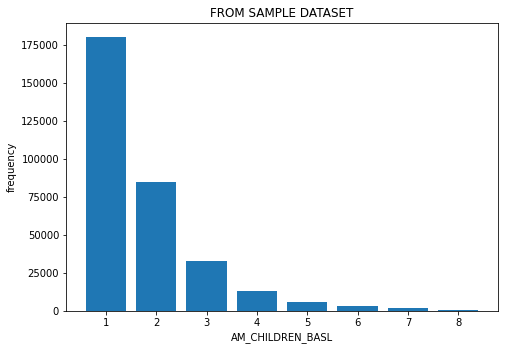

In [345]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bar_labels = ['1', '2', '3', '4', '5', '6', '7', '8']
bar_heights = [df[df['AM_CHILDREN _BASL'] == 1]['AM_CHILDREN _BASL'].count(),
              df[df['AM_CHILDREN _BASL'] == 2]['AM_CHILDREN _BASL'].count(),
              df[df['AM_CHILDREN _BASL'] == 3]['AM_CHILDREN _BASL'].count(),
              df[df['AM_CHILDREN _BASL'] == 4]['AM_CHILDREN _BASL'].count(),
              df[df['AM_CHILDREN _BASL'] == 5]['AM_CHILDREN _BASL'].count(),
              df[df['AM_CHILDREN _BASL'] == 6]['AM_CHILDREN _BASL'].count(),
              df[df['AM_CHILDREN _BASL'] == 7]['AM_CHILDREN _BASL'].count(),
              df[df['AM_CHILDREN _BASL'] == 8]['AM_CHILDREN _BASL'].count()]
ax.bar(bar_labels,bar_heights)
plt.xlabel('AM_CHILDREN_BASL')
plt.ylabel('frequency')
plt.title('FROM SAMPLE DATASET')
plt.show()

In [346]:
sum_ = 0

for i in range(1, 8):
    sum_ += df[df['AM_LIVE_B_ORDER'] == i]['AM_LIVE_B_ORDER'].count()



for i in range(1, 8):
    print("Frequency of {a} kids is {b}".format(a = i, b = df[df['AM_LIVE_B_ORDER'] == i]['AM_LIVE_B_ORDER'].count()/sum_))


Frequency of 1 kids is 0.9844173441734417
Frequency of 2 kids is 0.008807588075880758
Frequency of 3 kids is 0.0040650406504065045
Frequency of 4 kids is 0.0020325203252032522
Frequency of 5 kids is 0.0006775067750677507
Frequency of 6 kids is 0.0
Frequency of 7 kids is 0.0


In [347]:
#df['dead babies'] = df['AM_TOT_B_ORDER'] - df['AM_CHILDREN _BASL'] - df['AM_CHILDREN_BAND'] - df['AM_LIVE_B_ORDER']

def dead_babies(row):
    if row['AM_TOT_B_ORDER'] < 54 and row['AM_CHILDREN _BASL'] < 54 and row['AM_CHILDREN_BAND'] < 54 and row['AM_LIVE_B_ORDER'] < 54:
        return row['AM_TOT_B_ORDER'] - row['AM_CHILDREN _BASL'] - row['AM_CHILDREN_BAND'] - row['AM_LIVE_B_ORDER']
    else:
        return 99
    
df['dead_babies'] = df.apply(lambda row: dead_babies(row), axis=1)


def dead_babies_binary(row):
    for i in range(20):
        if row['dead_babies'] == i:
            return 1
    return 0

    
df['dead_babies_binary'] = df.apply(lambda row: dead_babies_binary(row), axis=1)

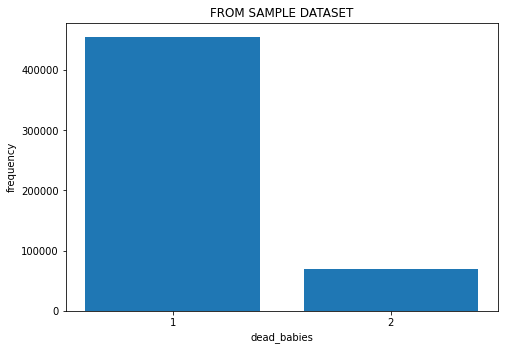

In [348]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bar_labels = ['1', '2']
bar_heights = [df[df['dead_babies'] == 1]['dead_babies'].count(),
              df[df['dead_babies'] == 2]['dead_babies'].count()]
ax.bar(bar_labels,bar_heights)
plt.xlabel('dead_babies')
plt.ylabel('frequency')
plt.title('FROM SAMPLE DATASET')
plt.show()

In [349]:
"""
52-53: number of children born alive now living (previous last birth) - am_children_basl
54-55: number of children born alive now dead (previous last birth) - am_children_band
58-59: total number of children ever born to mother (including last birth)
61:62: total number of children ever born alive to mother (including last birth) - am_tot_b_order

Total bo

"""

'\n52-53: number of children born alive now living (previous last birth) - am_children_basl\n54-55: number of children born alive now dead (previous last birth) - am_children_band\n58-59: total number of children ever born to mother (including last birth)\n61:62: total number of children ever born alive to mother (including last birth) - am_tot_b_order\n\nTotal bo\n\n'

In [350]:
df['AM_CHILDREN _BASL'].count()

565453

In [351]:
year_counts = []

for i in range(1969, 1988):
    print(list(df['year']).count(i))

17963
18455
17720
17341
18412
20368
22253
24556
27904
28750
31759
33247
33224
33638
33561
33700
37494
37622
38247


In [352]:
for key in df.keys():
    print(key)

DT_YEAR
ID_STATE
ID_AREA
ID_CERT
IN_RESIDENT
ID_RES_STATUS
ID_RESIDENCE
ID_OCCURENCE
ID_SEX
ID_ATTENDANT
ID_F_RACE
ID_M_RACE
ID_C_RACE
ID_C_RACE3
AM_M_AGE
AM_M_AGE36
AM_M_AGE15
AM_M_AGE12
AM_M_AGE8
AM_M_AGE7
AM_M_AGE6
AM_CHILDREN _BASL
AM_CHILDREN_BAND
AM_CHILDREN_BD
AM_TOT_B_ORDER
AM_TOT_B_ORDER9
AM_LIVE_B_ORDER
AM_LIVE_B_ORDER9
AM_LIVE_B_ORDER8
AM_LIVE_B_ORDER7
AM_LIVE_B_ORDER6
AM_LIVE_B_ORDER3
RESERVED
AM_F_AGE
AM_F_AGE11
AM_BIRTHWEIGHT
AM_BIRTHWEIGHT12
AM_BIRTHWEIGHT3
ID_DELIVERY_LOC
AM_PLURALITY
AM_PLURALITY3
AM_PLURALITY2
DT_BIRTH_MMDD
DT_LAST_MENSES
AM_GESTATION
AM_GESTATION10
AM_GESTATION3
ID_M_EDU
ID_M_EDU14
ID_M_EDU6
ID_F_EDU
ID_F_EDU14
IN_MARRIED
IN_MARRIED2
AM_PRENATAL
AM_PRENATAL10
AM_PRENATAL6
DT_LAST_LB_MM19YY
AM_POST_LAST_LB
AM_POST_LAST_LB17
AM_POST_LAST_LB10
AM_POST_LAST_LB8
DT_LAST_TERMIN
IN_LAST_TERMIN
AM_POST_LT
AM_POST_TLP
AM_POST_TLP9
ID_LAST_PREG
ID_M_BIRTHPLACE
AM_TOT_PRENATAL
IN_MALFORMATION
RESERVED2
IN_REPORT_FLAGS
IN_OCCUR_FLAGS
RESERVED3
ID_ATTENDANT_NCHS


In [353]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

(array([   904., 455590.,  68808.,  17036.,   4802.,   1968.]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <BarContainer object of 6 artists>)

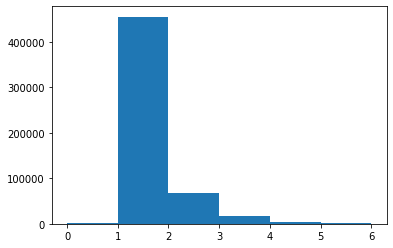

In [354]:
plt.hist(df['dead_babies'], bins=[0, 1, 2, 3, 4, 5, 6])

In [355]:
def dv_black(row):
    if row['ID_C_RACE3'] == 3:
        return 1
    return 0


def dv_white(row):
    if row['ID_C_RACE3'] == 1:
        return 1
    return 0


def dv_other(row):
    if row['ID_C_RACE3'] == 2:
        return 1
    return 0


df['dv_black'] = df.apply(lambda row: dv_black(row), axis=1)
df['dv_white'] = df.apply(lambda row: dv_white(row), axis=1)
df['dv_other'] = df.apply(lambda row: dv_other(row), axis=1)


In [356]:
def dv_m_age_1(row):
    if row['AM_M_AGE7'] == 1:
        return 1
    return 0

def dv_m_age_2(row):
    if row['AM_M_AGE7'] == 2:
        return 1
    return 0

def dv_m_age_3(row):
    if row['AM_M_AGE7'] == 3:
        return 1
    return 0

def dv_m_age_4(row):
    if row['AM_M_AGE7'] == 4:
        return 1
    return 0

def dv_m_age_5(row):
    if row['AM_M_AGE7'] == 5:
        return 1
    return 0

def dv_m_age_6(row):
    if row['AM_M_AGE7'] == 6:
        return 1
    return 0


def dv_m_age_7(row):
    if row['AM_M_AGE7'] == 7:
        return 1
    return 0


df['am_m_age_1'] = df.apply(lambda row: dv_m_age_1(row), axis=1)
df['am_m_age_2'] = df.apply(lambda row: dv_m_age_2(row), axis=1)
df['am_m_age_3'] = df.apply(lambda row: dv_m_age_3(row), axis=1)
df['am_m_age_4'] = df.apply(lambda row: dv_m_age_4(row), axis=1)
df['am_m_age_5'] = df.apply(lambda row: dv_m_age_5(row), axis=1)
df['am_m_age_6'] = df.apply(lambda row: dv_m_age_6(row), axis=1)
df['am_m_age_7'] = df.apply(lambda row: dv_m_age_7(row), axis=1)

In [357]:
def dv_f_age_1(row):
    if row['AM_F_AGE11'] == 1:
        return 1
    return 0

def dv_f_age_2(row):
    if row['AM_F_AGE11'] == 2:
        return 1
    return 0

def dv_f_age_3(row):
    if row['AM_F_AGE11'] == 3:
        return 1
    return 0

def dv_f_age_4(row):
    if row['AM_F_AGE11'] == 4:
        return 1
    return 0

def dv_f_age_5(row):
    if row['AM_F_AGE11'] == 5:
        return 1
    return 0

def dv_f_age_6(row):
    if row['AM_F_AGE11'] == 6:
        return 1
    return 0

def dv_f_age_7(row):
    if row['AM_F_AGE11'] == 7:
        return 1
    return 0

def dv_f_age_8(row):
    if row['AM_F_AGE11'] == 8:
        return 1
    return 0

def dv_f_age_9(row):
    if row['AM_F_AGE11'] == 9:
        return 1
    return 0

def dv_f_age_10(row):
    if row['AM_F_AGE11'] == 10:
        return 1
    return 0

def dv_f_age_11(row):
    if row['AM_F_AGE11'] == 11:
        return 1
    return 0


df['am_f_age_1'] = df.apply(lambda row: dv_f_age_1(row), axis=1)
df['am_f_age_2'] = df.apply(lambda row: dv_f_age_2(row), axis=1)
df['am_f_age_3'] = df.apply(lambda row: dv_f_age_3(row), axis=1)
df['am_f_age_4'] = df.apply(lambda row: dv_f_age_4(row), axis=1)
df['am_f_age_5'] = df.apply(lambda row: dv_f_age_5(row), axis=1)
df['am_f_age_6'] = df.apply(lambda row: dv_f_age_6(row), axis=1)
df['am_f_age_7'] = df.apply(lambda row: dv_f_age_7(row), axis=1)
df['am_f_age_8'] = df.apply(lambda row: dv_f_age_8(row), axis=1)
df['am_f_age_9'] = df.apply(lambda row: dv_f_age_9(row), axis=1)
df['am_f_age_10'] = df.apply(lambda row: dv_f_age_10(row), axis=1)
df['am_f_age_11'] = df.apply(lambda row: dv_f_age_11(row), axis=1)

In [358]:
def m_edu_1(row):
    if row['ID_M_EDU6'] == 1:
        return 1
    return 0

def m_edu_2(row):
    if row['ID_M_EDU6'] == 2:
        return 1
    return 0

def m_edu_3(row):
    if row['ID_M_EDU6'] == 3:
        return 1
    return 0

def m_edu_4(row):
    if row['ID_M_EDU6'] == 4:
        return 1
    return 0

def m_edu_5(row):
    if row['ID_M_EDU6'] == 5:
        return 1
    return 0


df['m_edu_1'] = df.apply(lambda row: m_edu_1(row), axis=1)
df['m_edu_2'] = df.apply(lambda row: m_edu_2(row), axis=1)
df['m_edu_3'] = df.apply(lambda row: m_edu_3(row), axis=1)
df['m_edu_4'] = df.apply(lambda row: m_edu_4(row), axis=1)
df['m_edu_5'] = df.apply(lambda row: m_edu_5(row), axis=1)

In [359]:
def f_edu_1(row):
    if row['ID_F_EDU14'] == 1:
        return 1
    return 0

def f_edu_2(row):
    if row['ID_F_EDU14'] == 2:
        return 1
    return 0

def f_edu_3(row):
    if row['ID_F_EDU14'] == 3:
        return 1
    return 0

def f_edu_4(row):
    if row['ID_F_EDU14'] == 4:
        return 1
    return 0

def f_edu_5(row):
    if row['ID_F_EDU14'] == 5:
        return 1
    return 0

def f_edu_6(row):
    if row['ID_F_EDU14'] == 6:
        return 1
    return 0

def f_edu_7(row):
    if row['ID_F_EDU14'] == 7:
        return 1
    return 0

def f_edu_8(row):
    if row['ID_F_EDU14'] == 8:
        return 1
    return 0

def f_edu_9(row):
    if row['ID_F_EDU14'] == 9:
        return 1
    return 0

def f_edu_10(row):
    if row['ID_F_EDU14'] == 10:
        return 1
    return 0

def f_edu_11(row):
    if row['ID_F_EDU14'] == 11:
        return 1
    return 0

def f_edu_12(row):
    if row['ID_F_EDU14'] == 12:
        return 1
    return 0

def f_edu_13(row):
    if row['ID_F_EDU14'] == 13:
        return 1
    return 0

def f_edu_14(row):
    if row['ID_F_EDU14'] == 14:
        return 1
    return 0

def f_edu_15(row):
    if row['ID_F_EDU14'] == 15:
        return 1
    return 0

def f_edu_16(row):
    if row['ID_F_EDU14'] == 16:
        return 1
    return 0

def f_edu_17(row):
    if row['ID_F_EDU14'] == 17:
        return 1
    return 0


df['f_edu_1'] = df.apply(lambda row: f_edu_1(row), axis=1)
df['f_edu_2'] = df.apply(lambda row: f_edu_2(row), axis=1)
df['f_edu_3'] = df.apply(lambda row: f_edu_3(row), axis=1)
df['f_edu_4'] = df.apply(lambda row: f_edu_4(row), axis=1)
df['f_edu_5'] = df.apply(lambda row: f_edu_5(row), axis=1)
df['f_edu_6'] = df.apply(lambda row: f_edu_6(row), axis=1)
df['f_edu_7'] = df.apply(lambda row: f_edu_7(row), axis=1)
df['f_edu_8'] = df.apply(lambda row: f_edu_8(row), axis=1)
df['f_edu_9'] = df.apply(lambda row: f_edu_9(row), axis=1)
df['f_edu_10'] = df.apply(lambda row: f_edu_10(row), axis=1)
df['f_edu_11'] = df.apply(lambda row: f_edu_11(row), axis=1)
df['f_edu_12'] = df.apply(lambda row: f_edu_12(row), axis=1)
df['f_edu_13'] = df.apply(lambda row: f_edu_13(row), axis=1)
df['f_edu_14'] = df.apply(lambda row: f_edu_14(row), axis=1)
df['f_edu_15'] = df.apply(lambda row: f_edu_15(row), axis=1)
df['f_edu_16'] = df.apply(lambda row: f_edu_16(row), axis=1)
df['f_edu_17'] = df.apply(lambda row: f_edu_17(row), axis=1)

In [360]:
def dv_birthweight(row):
    if row['AM_BIRTHWEIGHT3'] == 1:
        return 1
    return 0


df['dv_birthweight'] = df.apply(lambda row: dv_birthweight(row), axis=1)
df['dv_birthweight'] = df.apply(lambda row: dv_birthweight(row), axis=1)

In [361]:
df.drop(df.index[df['AM_F_AGE11'] == 11], inplace=True)
df.drop(df.index[df['ID_M_EDU6'] == 0], inplace=True)
df.drop(df.index[df['ID_M_EDU6'] == 6], inplace=True)
df.drop(df.index[df['ID_F_EDU14'] == 0], inplace=True)
df.drop(df.index[df['ID_F_EDU14'] == 14], inplace=True)
df.drop(df.index[df['AM_BIRTHWEIGHT3'] == 3], inplace=True)


In [362]:
df['AM_F_AGE11'].count()

372866

In [427]:
x_columns = [
    'AM_M_AGE15',
    'AM_F_AGE11',
    'ID_M_EDU6',
    'ID_F_EDU14',
    'dv_black',
    'dv_white',
    'dv_other'
    ]

In [428]:
X = df[x_columns]        

In [429]:
y = df['dv_birthweight']

In [430]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [431]:
len(X)

372866

In [432]:
len(y)

372866

In [433]:
from sklearn.linear_model import LogisticRegression

In [434]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [435]:
from sklearn.metrics import classification_report
target_names = ['underweight', 'healthy weight']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

   underweight       0.94      1.00      0.97     87421
healthy weight       0.00      0.00      0.00      5796

      accuracy                           0.94     93217
     macro avg       0.47      0.50      0.48     93217
  weighted avg       0.88      0.94      0.91     93217



C:\Users\rliam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rliam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rliam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

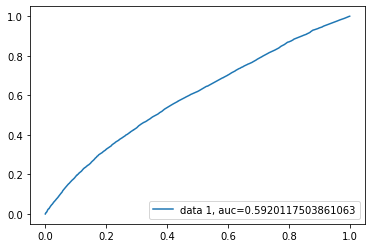

In [436]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [397]:
lm = linear_model.LinearRegression()
y = df['AM_BIRTHWEIGHT']
model = lm.fit(X, y)

In [398]:
predictions = lm.predict(X)

In [399]:
lm.score(X,y)

0.02546145898932639

In [400]:
X.corr()

,IN_MARRIED,AM_M_AGE15,AM_F_AGE11,ID_M_EDU6,ID_F_EDU14,dv_black,dv_white,dv_other
IN_MARRIED,1.000000,-0.030700,-0.017446,-0.049698,-0.032192,0.022402,-0.013201,-0.015411
AM_M_AGE15,-0.030700,1.000000,0.656204,0.403821,0.312555,-0.058706,0.041439,0.025793
AM_F_AGE11,-0.017446,0.656204,1.000000,0.212350,0.185419,-0.011121,-0.010095,0.043149
ID_M_EDU6,-0.049698,0.403821,0.212350,1.000000,0.660586,-0.072976,0.064536,0.004294
ID_F_EDU14,-0.032192,0.312555,0.185419,0.660586,1.000000,-0.100356,0.083576,0.016935
dv_black,0.022402,-0.058706,-0.011121,-0.072976,-0.100356,1.000000,-0.883651,-0.060316
dv_white,-0.013201,0.041439,-0.010095,0.064536,0.083576,-0.883651,1.000000,-0.413996
dv_other,-0.015411,0.025793,0.043149,0.004294,0.016935,-0.060316,-0.413996,1.000000


In [401]:
for item in x_columns:
    print(pearsonr(df[item], y))

PearsonRResult(statistic=-0.028144623323037743, pvalue=3.1975385837948e-66)
PearsonRResult(statistic=0.08535831388062697, pvalue=0.0)
PearsonRResult(statistic=0.04753149533237634, pvalue=2.0369191646886718e-185)
PearsonRResult(statistic=0.08877250065173067, pvalue=0.0)
PearsonRResult(statistic=0.07720138153079434, pvalue=0.0)
PearsonRResult(statistic=-0.12204344947726084, pvalue=0.0)
PearsonRResult(statistic=0.12171148954383046, pvalue=0.0)
PearsonRResult(statistic=-0.02220742525286389, pvalue=6.719159232645427e-42)


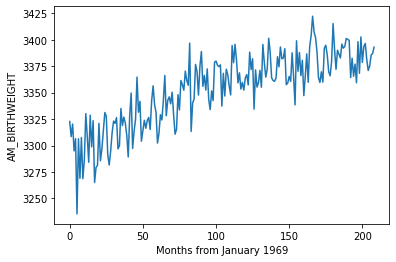

<Figure size 640x480 with 0 Axes>

In [406]:
time_series_graph('AM_BIRTHWEIGHT')

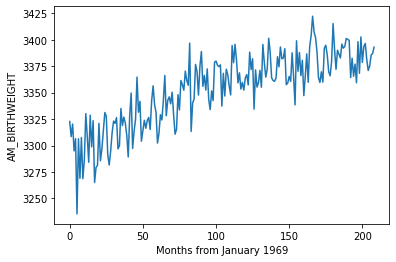

<Figure size 640x480 with 0 Axes>

In [440]:
time_series_graph('AM_BIRTHWEIGHT')

In [411]:
for key in df.keys():
    print(key)

DT_YEAR
ID_STATE
ID_AREA
ID_CERT
IN_RESIDENT
ID_RES_STATUS
ID_RESIDENCE
ID_OCCURENCE
ID_SEX
ID_ATTENDANT
ID_F_RACE
ID_M_RACE
ID_C_RACE
ID_C_RACE3
AM_M_AGE
AM_M_AGE36
AM_M_AGE15
AM_M_AGE12
AM_M_AGE8
AM_M_AGE7
AM_M_AGE6
AM_CHILDREN _BASL
AM_CHILDREN_BAND
AM_CHILDREN_BD
AM_TOT_B_ORDER
AM_TOT_B_ORDER9
AM_LIVE_B_ORDER
AM_LIVE_B_ORDER9
AM_LIVE_B_ORDER8
AM_LIVE_B_ORDER7
AM_LIVE_B_ORDER6
AM_LIVE_B_ORDER3
RESERVED
AM_F_AGE
AM_F_AGE11
AM_BIRTHWEIGHT
AM_BIRTHWEIGHT12
AM_BIRTHWEIGHT3
ID_DELIVERY_LOC
AM_PLURALITY
AM_PLURALITY3
AM_PLURALITY2
DT_BIRTH_MMDD
DT_LAST_MENSES
AM_GESTATION
AM_GESTATION10
AM_GESTATION3
ID_M_EDU
ID_M_EDU14
ID_M_EDU6
ID_F_EDU
ID_F_EDU14
IN_MARRIED
IN_MARRIED2
AM_PRENATAL
AM_PRENATAL10
AM_PRENATAL6
DT_LAST_LB_MM19YY
AM_POST_LAST_LB
AM_POST_LAST_LB17
AM_POST_LAST_LB10
AM_POST_LAST_LB8
DT_LAST_TERMIN
IN_LAST_TERMIN
AM_POST_LT
AM_POST_TLP
AM_POST_TLP9
ID_LAST_PREG
ID_M_BIRTHPLACE
AM_TOT_PRENATAL
IN_MALFORMATION
RESERVED2
IN_REPORT_FLAGS
IN_OCCUR_FLAGS
RESERVED3
ID_ATTENDANT_NCHS


Text(0.5, 0, 'Birth Rate (grams)')

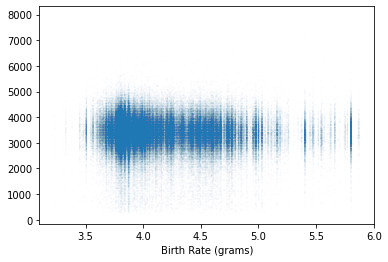

In [439]:
plt.scatter(df['GHIAnnual'], df['AM_BIRTHWEIGHT'], s=[1/10000 for s in range(len(df['GHIAnnual']))])
plt.xlabel('Sunlight')
plt.xlabel('Birth Rate (grams)')